In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [3]:
cd /Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep

/Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep


In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 80, dpi_save=300, facecolor='white', vector_friendly=True, transparent=True)

scanpy==1.7.0rc1 anndata==0.7.5 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [6]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

scanpy


## Read dataset

In [7]:
adata = sc.read('./220310_concat_dataset.h5ad', cache=True)

In [8]:
adata

AnnData object with n_obs × n_vars = 10653 × 2629
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'clusters'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'clusters_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Correlation matrix of the samples

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_batch']`


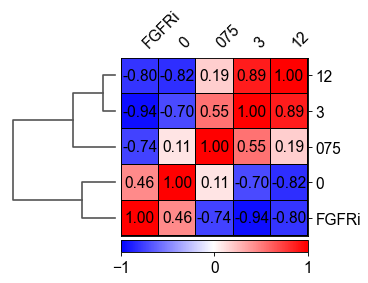

In [9]:
sc.pl.correlation_matrix(adata, groupby = 'batch', dendrogram=True, show_correlation_numbers=True, save='batch.pdf')

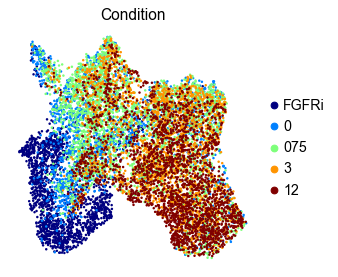

In [10]:
sc.pl.umap(adata, color='batch', title='Condition', frameon=False, size=20, save='Condition.pdf')

computing density on 'umap'
--> added
    'umap_density_batch', densities (adata.obs)
    'umap_density_batch_params', parameter (adata.uns)


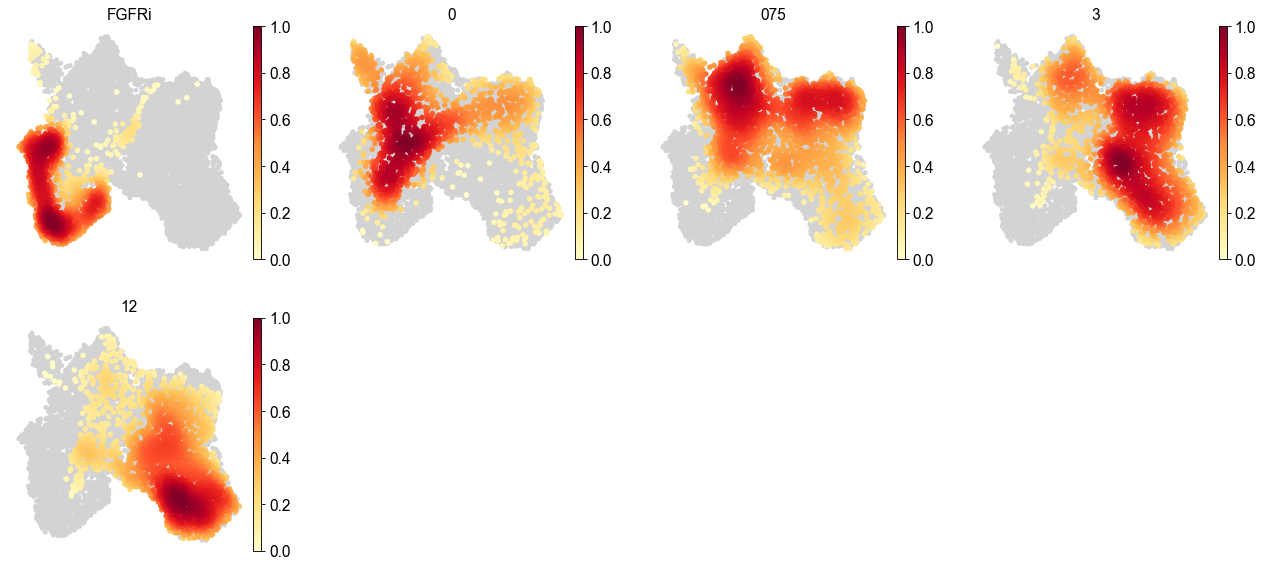

In [13]:
sc.tl.embedding_density(adata, groupby='batch')
sc.pl.embedding_density(adata, groupby='batch', save='density_batch.pdf', fg_dotsize=100, frameon=False)

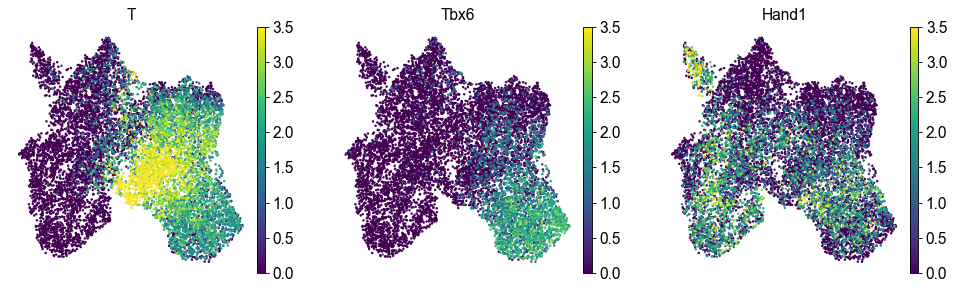

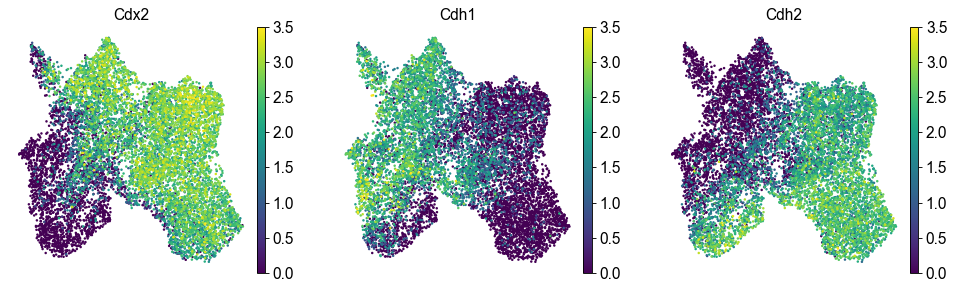

In [14]:
sc.pl.umap(adata, color=['T', 'Tbx6', 'Hand1'], frameon=False, size= 20, save='markers.pdf', vmax=3.5)
sc.pl.umap(adata, color=['Cdx2', 'Cdh1', 'Cdh2'], frameon=False, size= 20, save='markers2.pdf', vmax=3.5)

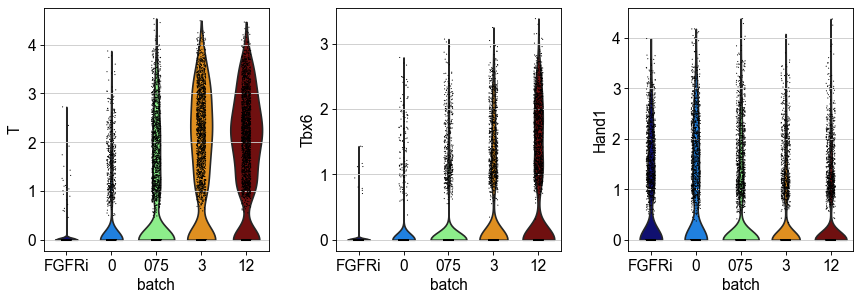

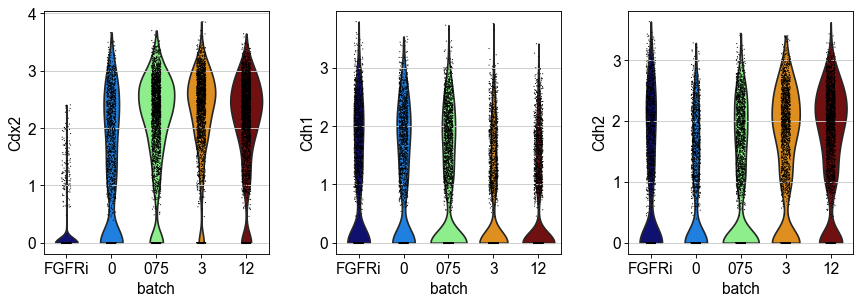

In [15]:
sc.pl.violin(adata, ['T', 'Tbx6', 'Hand1'], groupby='batch', scale='count', save='markers.pdf')
sc.pl.violin(adata, ['Cdx2', 'Cdh1', 'Cdh2'], groupby='batch', scale='count', save='markers2.pdf')

running Leiden clustering
    finished: found 8 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


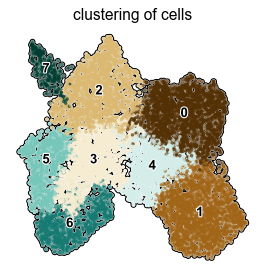

batch     FGFRi    0  075    3    12
clusters                            
0            17  334  778  661   453
1             0  110  320  557  1089
2            23  435  851  359   201
3           111  515  429  146   218
4             1   14  228  378   435
5           757  116   18    0     0
6           758   52    3    0     0
7            34  120   98   24    10

In [16]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.33)
sc.pl.umap(adata, color=['clusters'], add_outline=True, legend_loc='on data', legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells', palette='BrBG', size=40, save='cluster33.pdf')
pd.crosstab(adata.obs.clusters, adata.obs.batch)

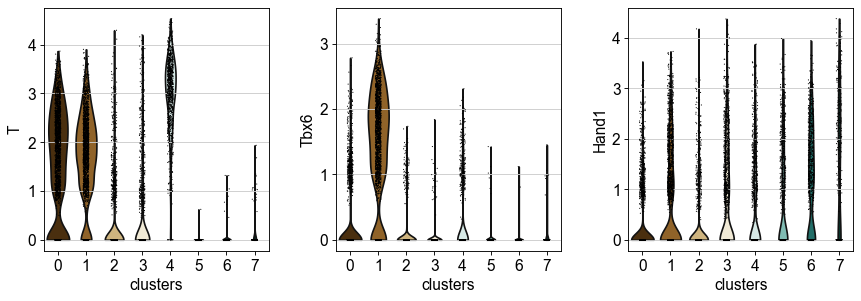

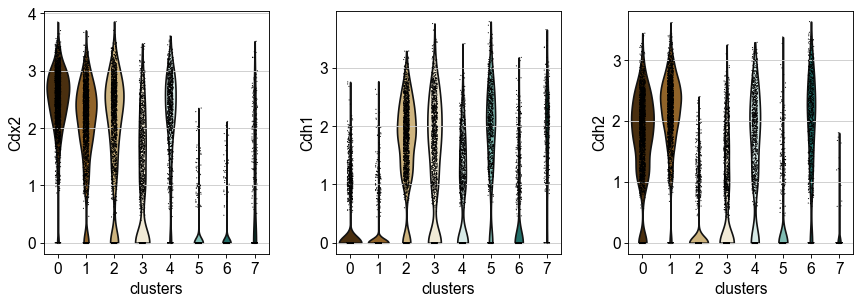

In [19]:
sc.pl.violin(adata, ['T', 'Tbx6', 'Hand1'], groupby='clusters', scale='count', save='markers_c.pdf')
sc.pl.violin(adata, ['Cdx2', 'Cdh1', 'Cdh2'], groupby='clusters', scale='count', save='markers_c2.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_batch']`


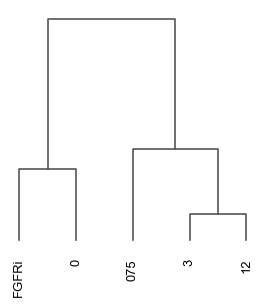

In [17]:
sc.tl.dendrogram(adata, 'batch')
ax = sc.pl.dendrogram(adata, 'batch', save='batch.pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`


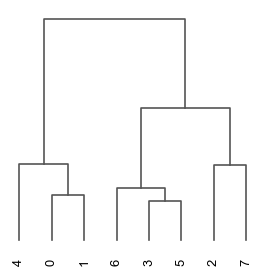

In [18]:
sc.tl.dendrogram(adata, 'clusters')
ax = sc.pl.dendrogram(adata, 'clusters', save='clusters.pdf')

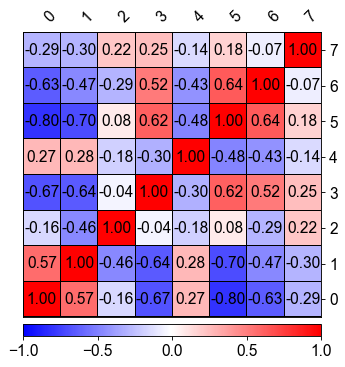

In [12]:
sc.pl.correlation_matrix(adata, groupby = 'clusters', dendrogram=False, show_correlation_numbers=True, save='cluster.pdf')

## Endogenous cell signaling

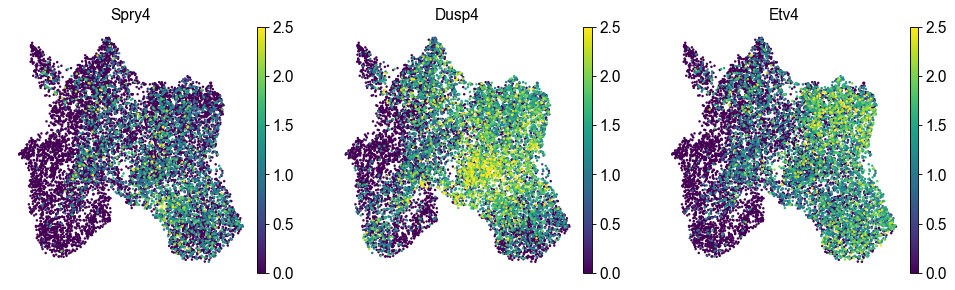

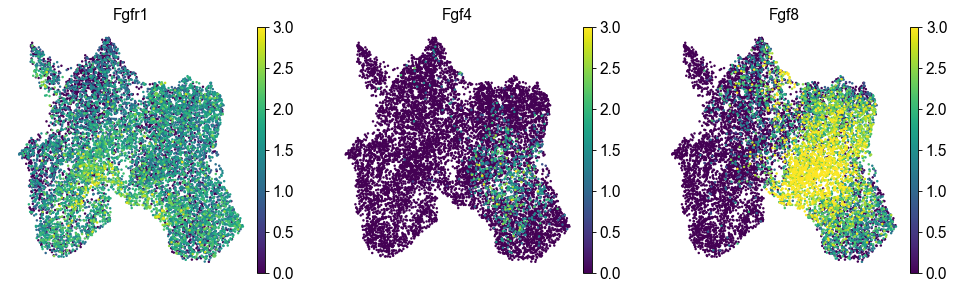

In [20]:
sc.pl.umap(adata, color=['Spry4', 'Dusp4', 'Etv4'], frameon=False, vmax=2.5, size= 20, save='FGFtarget.pdf')
sc.pl.umap(adata, color=['Fgfr1','Fgf4', 'Fgf8'], frameon=False, vmax= 3, size= 20, save='FGFr-FGF.pdf')

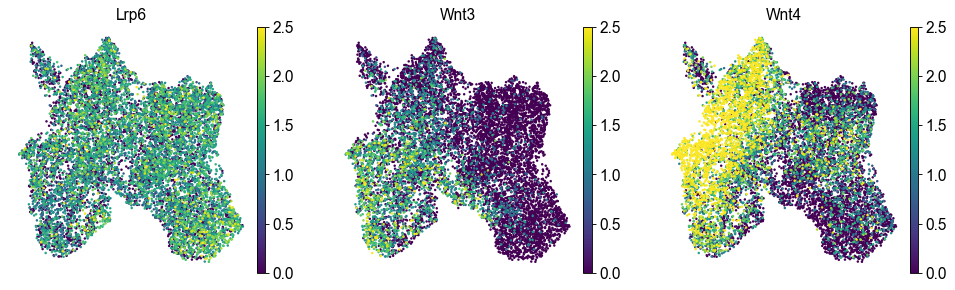

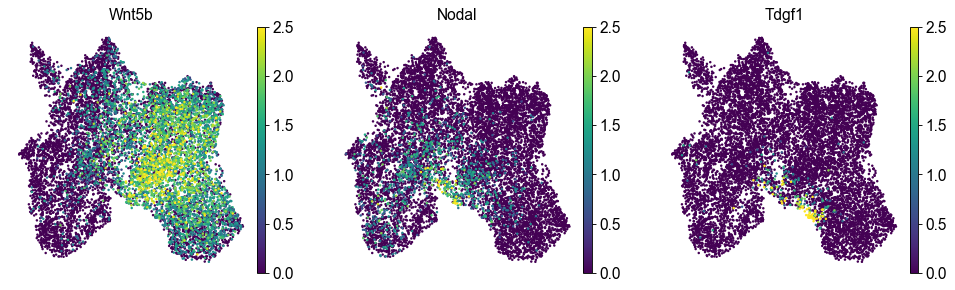

In [21]:
sc.pl.umap(adata, color=['Lrp6', 'Wnt3', 'Wnt4'], frameon=False, vmax=2.5, size= 20, save='WNT.pdf')
sc.pl.umap(adata, color=['Wnt5b', 'Nodal', 'Tdgf1'], frameon=False, vmax=2.5, size= 20, save='WNT_NODAL.pdf')

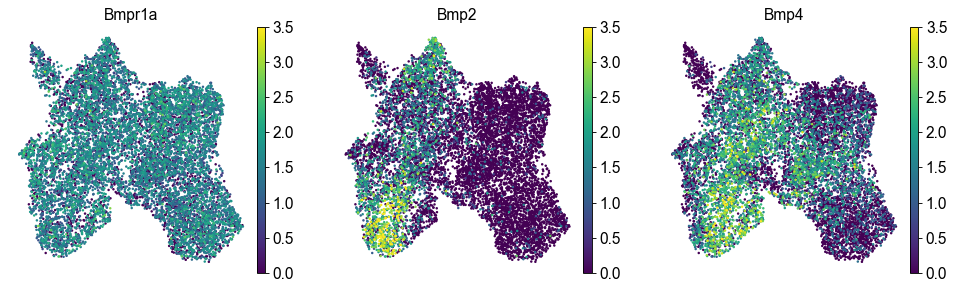

In [22]:
sc.pl.umap(adata, color=['Bmpr1a', 'Bmp2', 'Bmp4'], frameon=False, vmax=3.5, size= 20, save='BMP.pdf')

# dictionaries

In [26]:
signaling_FGF = {'FGF targets': ['Spry4', 'Dusp4', 'Dusp6', 'Etv4', 'Evx1'], #Ptgs1
                 'FGFR': ['Fgfr1', 'Fgfr2', 'Fgfr3', 'Fgfr4'], 
                 'FGFs': ['Fgf4', 'Fgf8', 'Fgf3', 'Fgf5', 'Fgf17'], #lower expressed FGFs:['Fgf9', 'Fgf13', 'Fgf15', 'Fgf18']
             }

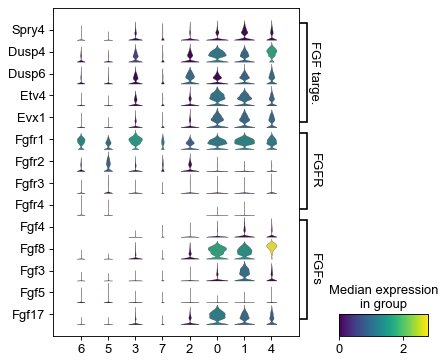

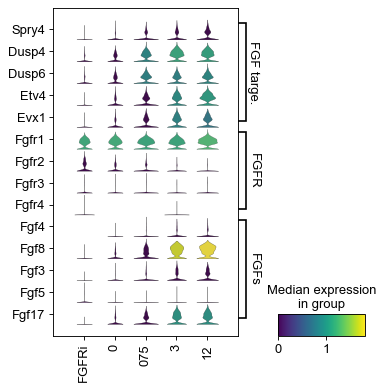

In [28]:
order_list = ['6', '5', '3', '7', '2', '0', '1', '4']
ax = sc.pl.stacked_violin(adata, signaling_FGF, groupby='clusters', cmap='viridis', dendrogram=False, 
                          swap_axes=True, categories_order= order_list, scale='count',
                          figsize= [6,5], save='signaling_FGF.pdf')
ax = sc.pl.stacked_violin(adata, signaling_FGF, groupby='batch', cmap='viridis', dendrogram=False, 
                          swap_axes=True, scale='count',
                          figsize= [5,5],save='signaling_FGF2.pdf')

In [29]:
signaling_W_N_A = {'WNTR' : ['Lrp5', 'Lrp6'],
                'WNTs': ['Wnt3', 'Wnt4', 'Wnt6', 'Wnt3a','Wnt5a', 'Wnt5b'],
                'WNTi': ['Sfrp1', 'Sfrp2', 'Dkk1'],
                 'NODAL s': ['Nodal', 'Tdgf1', 'Lefty1', 'Lefty2'],
                'Activin s': ['Inhba', 'Fst']
             }

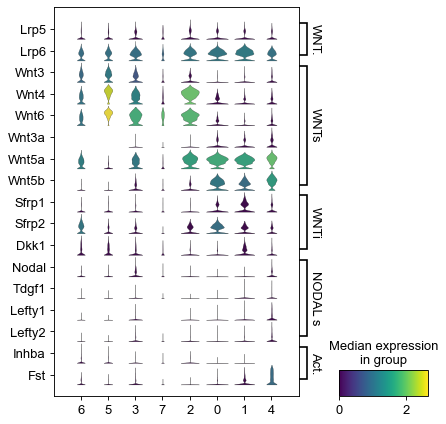

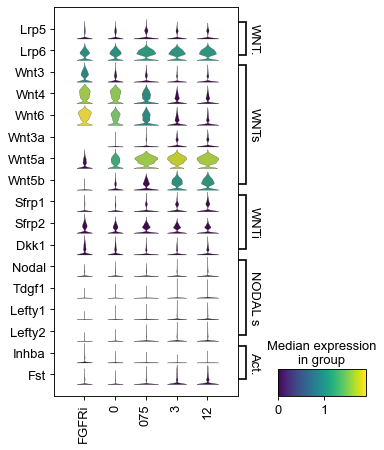

In [31]:
order_list = ['6', '5', '3', '7', '2', '0', '1', '4']
ax = sc.pl.stacked_violin(adata, signaling_W_N_A, groupby='clusters', cmap='viridis', dendrogram=False, 
                          swap_axes=True, categories_order= order_list, scale='count',
                          figsize= [6,6], save='signaling_W_N_A.pdf')
ax = sc.pl.stacked_violin(adata, signaling_W_N_A, groupby='batch', cmap='viridis', dendrogram=False, 
                          swap_axes=True, scale='count',
                          figsize= [5,6],save='signaling_W_N_A2.pdf')

In [33]:
signaling_BMP = {'BMPRs': ['Bmpr1a','Bmpr2'],
                 'BMP': ['Bmp1', 'Bmp2','Bmp4', 'Bmp5', 'Bmp7'],
                'BMP s': ['Smad7', 'Nog']
             }

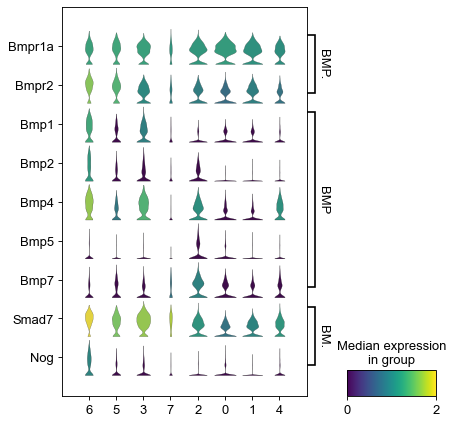

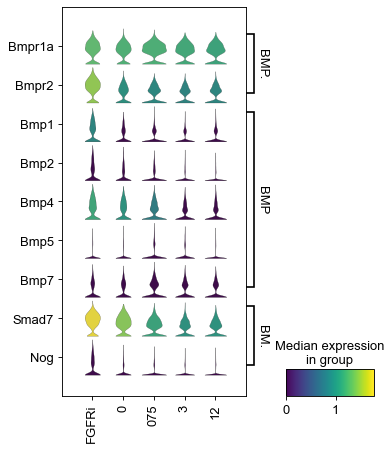

In [34]:
order_list = ['6', '5', '3', '7', '2', '0', '1', '4']
ax = sc.pl.stacked_violin(adata, signaling_BMP, groupby='clusters', cmap='viridis', dendrogram=False, 
                          swap_axes=True, categories_order= order_list, scale='count',
                          figsize= [6,6], save='signaling_BMP.pdf')
ax = sc.pl.stacked_violin(adata, signaling_BMP, groupby='batch', cmap='viridis', dendrogram=False, 
                          swap_axes=True, scale='count',
                          figsize= [5,6],save='signaling_BMP2.pdf')

In [89]:
adata_fgfri = adata[adata.obs.batch == 'FGFRi']
adata_0 = adata[adata.obs.batch == '0']
adata_075 = adata[adata.obs.batch == '075']
adata_3 = adata[adata.obs.batch == '3']
adata_12 = adata[adata.obs.batch == '12']

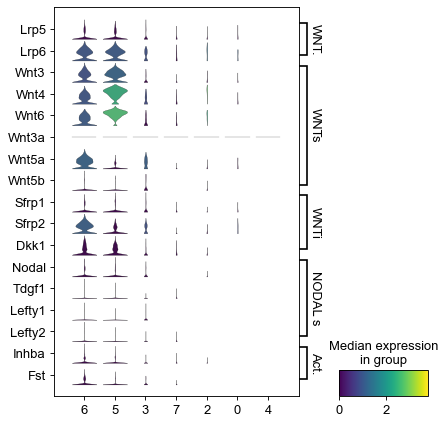

In [15]:
order_list = ['6', '5', '3', '7', '2', '0','4']
ax = sc.pl.stacked_violin(adata_fgfri, signaling_W_N_A, groupby='clusters', cmap='viridis', dendrogram=False, 
                        swap_axes=True, categories_order= order_list, scale='count',
                        figsize= [6,6], save='OTHER-FGFRi.pdf')

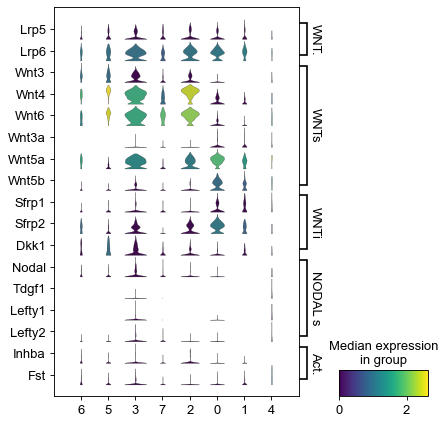

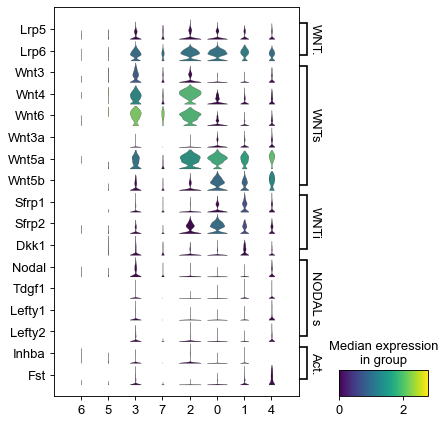

In [13]:
order_list = ['6', '5', '3', '7', '2', '0', '1', '4']
ax = sc.pl.stacked_violin(adata_0, signaling_W_N_A, groupby='clusters', cmap='viridis', dendrogram=False, 
                        swap_axes=True, categories_order= order_list, scale='count',
                        figsize= [6,6], save='OTHER-0.pdf')
ax = sc.pl.stacked_violin(adata_075, signaling_W_N_A, groupby='clusters', cmap='viridis', dendrogram=False, 
                        swap_axes=True, categories_order= order_list, scale='count',
                        figsize= [6,6], save='OTHER-075.pdf')

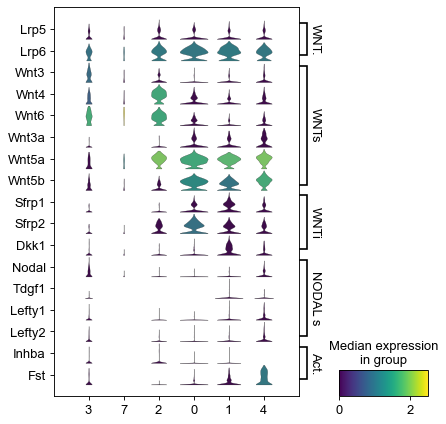

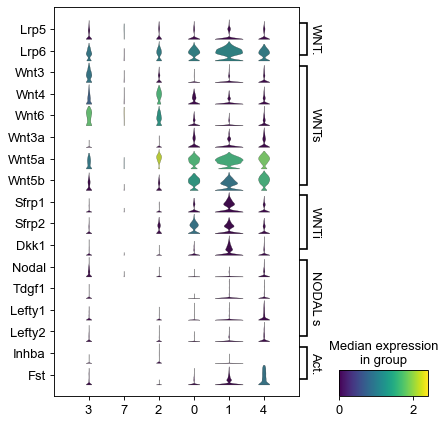

In [14]:
order_list = ['3', '7', '2', '0', '1', '4']
ax = sc.pl.stacked_violin(adata_3, signaling_W_N_A, groupby='clusters', cmap='viridis', dendrogram=False, 
                        swap_axes=True, categories_order= order_list, scale='count',
                        figsize= [6,6], save='OTHER-3.pdf')
ax = sc.pl.stacked_violin(adata_12, signaling_W_N_A, groupby='clusters', cmap='viridis', dendrogram=False, 
                        swap_axes=True, categories_order= order_list, scale='count',
                        figsize= [6,6], save='OTHER-12.pdf')